# Census Income Project

Descritpion:  In this dataset, classes are ordered, but it was not balanced. Who is making more then 50K $ income per, who are not 

These are the name of Features from the dataset :-

    Age	
    Workclass
    Fnlwgt
    Education
    Education_num
    Marital_status
    Occupation
    Relationship
    Race	
    Sex
    Capital_gain
    Capital_loss	
    Hours_per_week
    Native_country
    Income



In [3]:
# importing the libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [4]:
#loading the data set
df= pd.read_csv('census_income.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.shape

(32560, 15)

Observation: Dataset contains the 32560 reocrds 15 variables

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Observation: Dataset contains the object and interger data types

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Observation: 
1. dataset contains no null values 

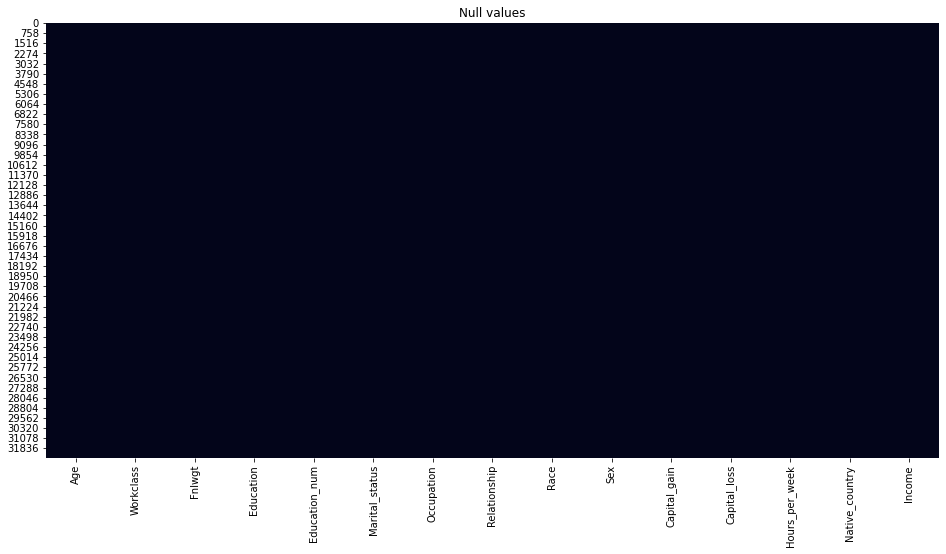

In [16]:
#Heat map to check the null values
plt.figure(figsize=[16,8])
sns.heatmap(df.isnull(), cbar=False)
plt.title('Null values')
plt.show()

Observation: 
1. No variable columns contains missing and null values 

In [17]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


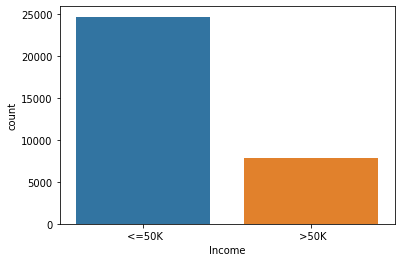

In [18]:
print(df['Income'].value_counts())
sns.countplot(df['Income'])
plt.show()

OObservation: People who makes greater then 50K population is 7841 and who makes less then 50K is 24719

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


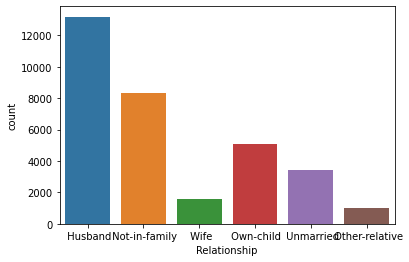

In [19]:
print(df['Relationship'].value_counts())
sns.countplot(df['Relationship'])
plt.show()

Observation: Realtionship contains five types in which most populaltion is the Husband ,second is "not in family" in last other relatives 

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
Fnlwgt,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
Education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
Capital_loss,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hours_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


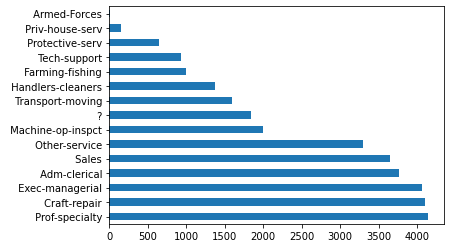

In [21]:
df['Occupation'].value_counts(normalize=False)[:15].plot(kind='barh')

Observation: Highest population of occuption is the Prof -speciality 

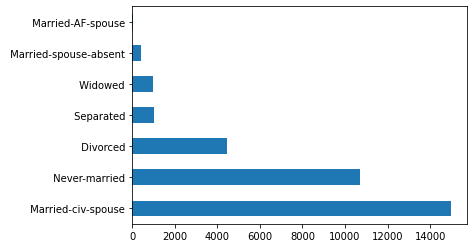

In [22]:
df['Marital_status'].value_counts(normalize=False)[:15].plot(kind='barh')

Observation : Married CIV spouse is the highest number in marital_status and least is Marries AF spouse

In [23]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

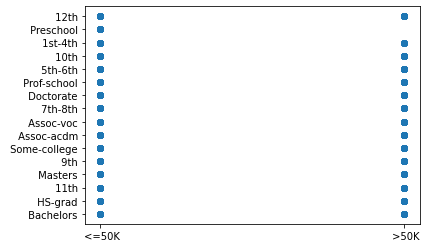

In [24]:
plt.scatter(df['Income'],df['Education'])

Observaion: Highest number of people who completed the HS-grad and lowest is the Preshcool


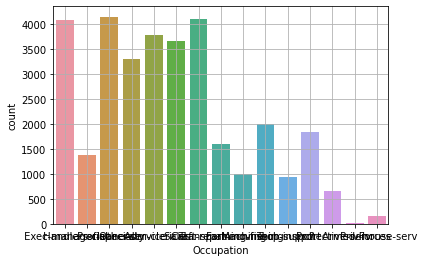

In [25]:
# plot data points
sns.countplot(df["Occupation"],)
plt.grid()

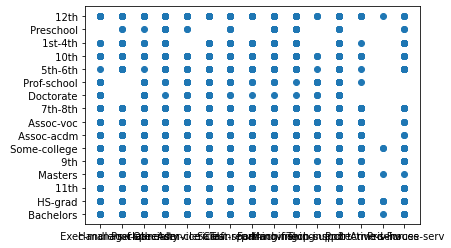

In [26]:
plt.scatter(df['Occupation'], df['Education'])

Observation: We can see the data ditributed normally  occutption education

In [27]:
#Encoding the Cateogorical variables 
#label encoding 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

#df_train = pd.get_dummies(df_train, columns=['Profile'])
df['Workclass'] = le.fit_transform(df['Workclass'])
df['Education'] = le.fit_transform(df['Education'])
df['Marital_status'] = le.fit_transform(df['Marital_status'])
df['Occupation'] = le.fit_transform(df['Occupation'])
df['Relationship'] = le.fit_transform(df['Relationship'])
df['Race'] = le.fit_transform(df['Race'])
df['Sex'] = le.fit_transform(df['Sex'])
df['Native_country'] = le.fit_transform(df['Native_country'])
df['Income'] = le.fit_transform(df['Income'])

In [28]:
df.head(5)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


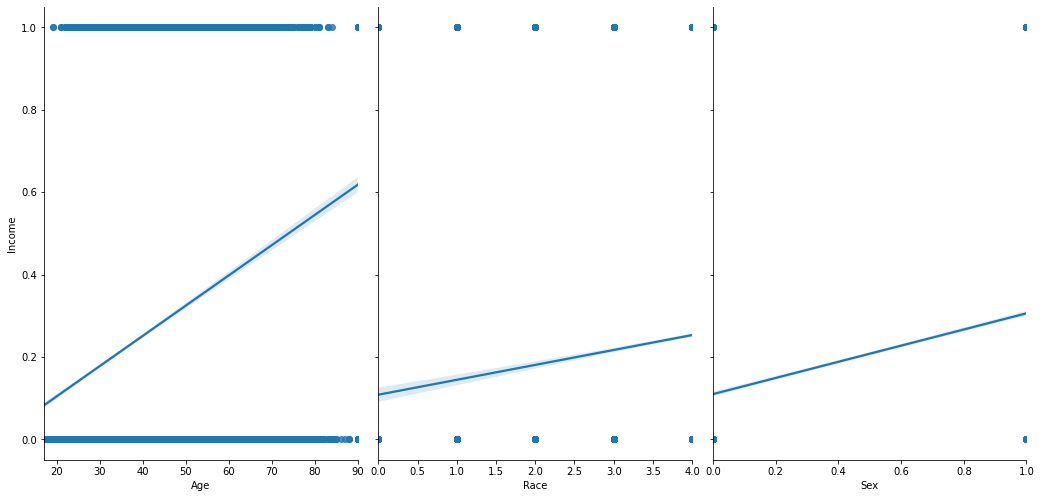

In [29]:
sns.pairplot(df, x_vars=['Age','Race','Sex'], y_vars='Income', size=7, aspect=0.7, kind='reg')

Observation: 
1. We clearly see that as "Age" increase income also increase very high rate
2. Race and sex also have some positive relation with  income 


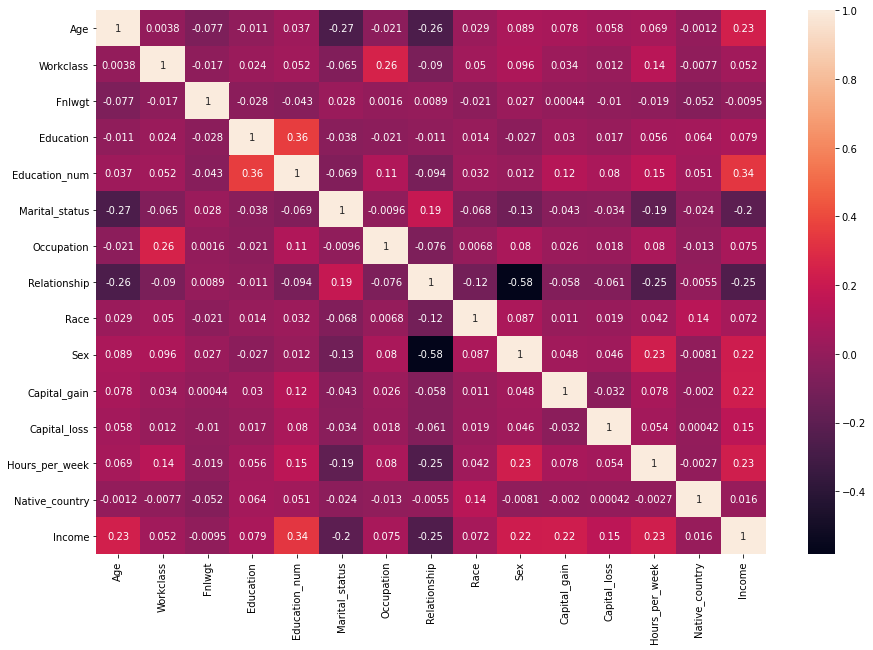

In [30]:
#To check the corr_mat  Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_hmap, annot=True)
plt.show()

Observation:
1. Education_num and income have the positive relation 34%
2. relationship with income have negative relationship -25%
3. Hour_per_week have positive relation with income 23%
4. Occuption and work class have the 26%

In [31]:
#to display the
corr_matrix=df.corr()
corr_matrix['Income'].sort_values(ascending = False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

OBservation:
1. Education number have positive relationship with target varibles income 33%
2. Education number, age, Hours_per_week,Capital_gain,Sex,Capital_loss,Education,Occupation,Race, Workclass, Native_country, ALso  have positive reaionship with Income
3. FnlGHT, Merital_status, relationship negative relationship income


In [32]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

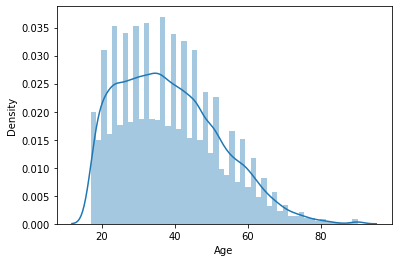

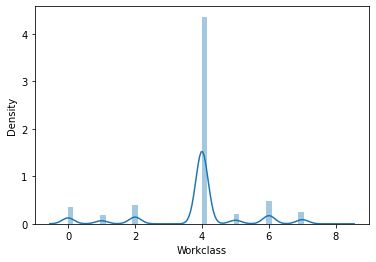

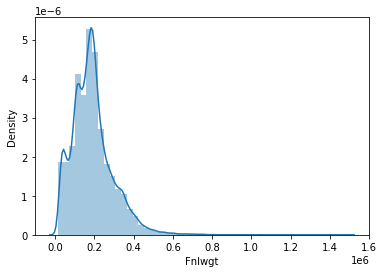

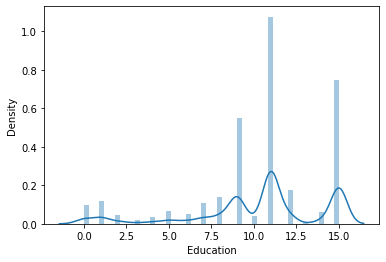

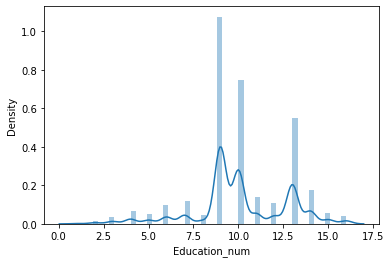

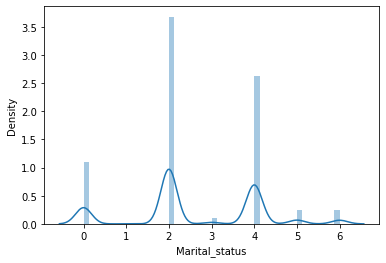

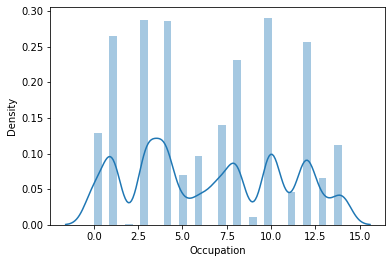

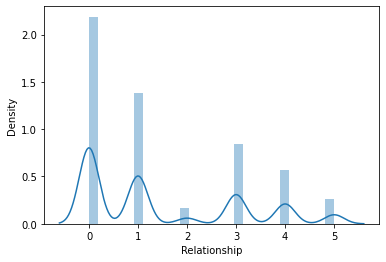

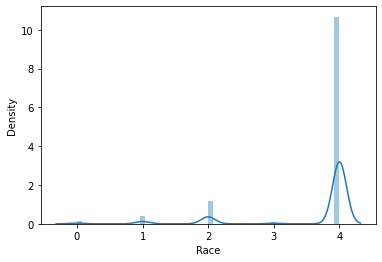

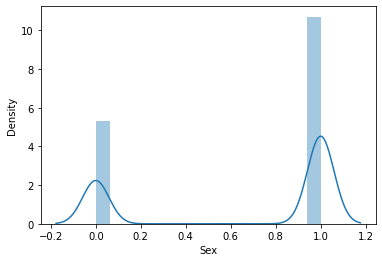

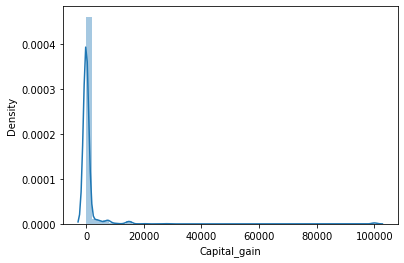

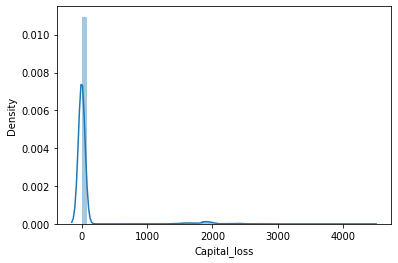

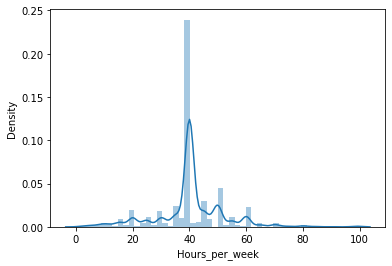

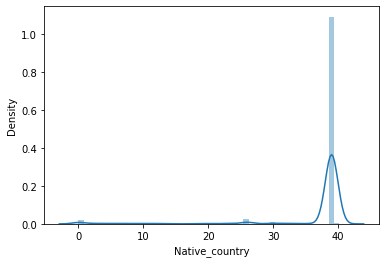

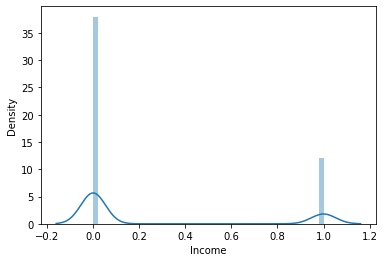

In [33]:
columns =['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income']
        
for i in df[columns]:
    plt.figure()
    sns.distplot(df[i])


1. Variable workclass data is ditrbuted normly 
2. Remainng all data is not distributed normally right skewed and left skewed


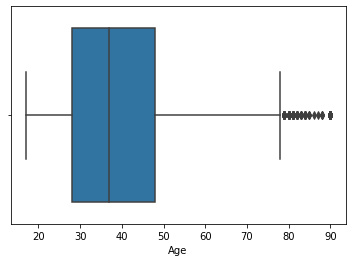

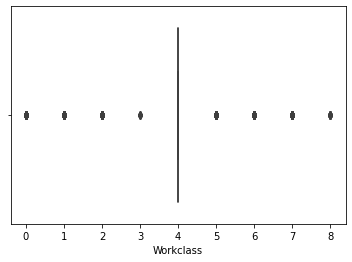

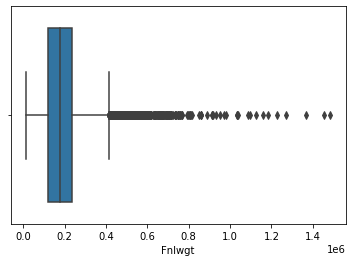

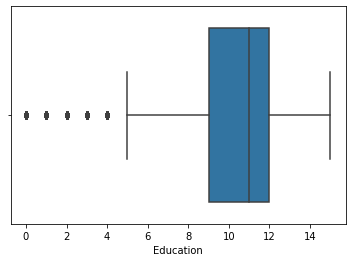

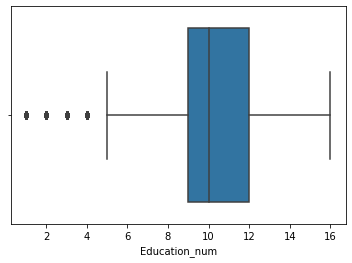

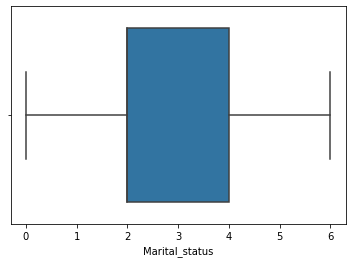

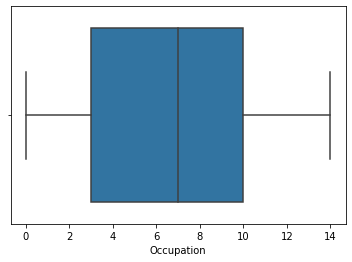

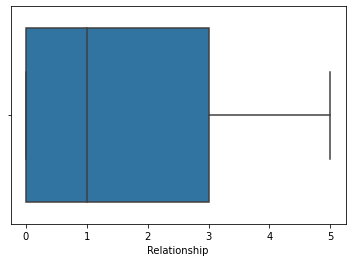

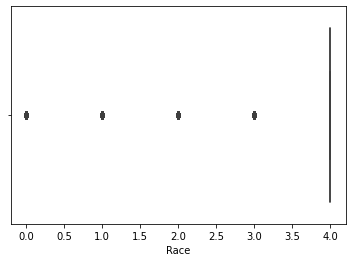

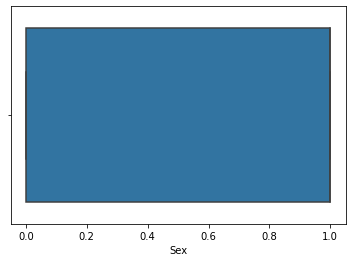

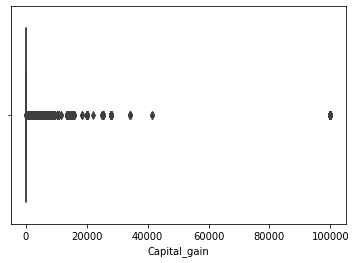

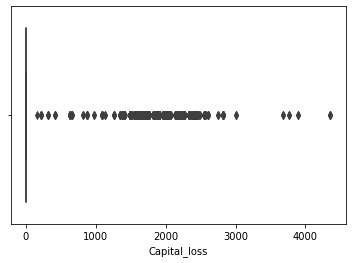

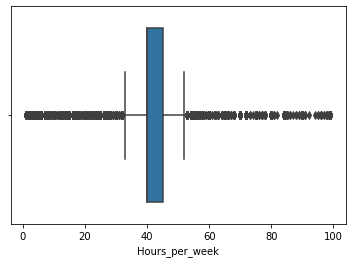

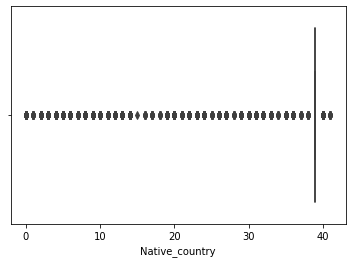

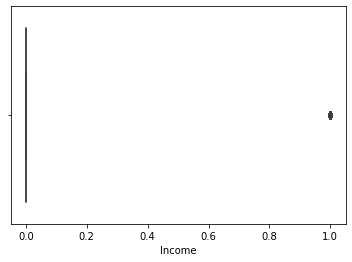

In [34]:
# with the help of box plot checking the outliers in data set 
for i in df[columns]:
    plt.figure()
    sns.boxplot(df[i])

In [35]:
#Spliting the data into Feature variables (X) and target variables (y)

x = df.drop(['Income'],axis=1)
y = df['Income']

In [36]:
# creating train test splits
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [37]:
# import libraries
#NOrmalizing the data using minmax scaler
  
from sklearn.preprocessing import MinMaxScaler
# creating scaler scale var.
norm = MinMaxScaler()
# fit the scal
norm_fit = norm.fit(x_train)
# transfromation of trainig data
scal_xtrain = norm_fit.transform(x_train)
# transformation of testing data
scal_xtest = norm_fit.transform(x_test)
print(scal_xtrain)

[[0.42465753 0.75       0.21483069 ... 0.         0.63265306 0.95121951]
 [0.05479452 0.5        0.14203352 ... 0.         0.39795918 0.95121951]
 [0.24657534 0.5        0.13760408 ... 0.         0.44897959 0.95121951]
 ...
 [0.65753425 0.5        0.10775051 ... 0.         0.39795918 0.95121951]
 [0.19178082 0.5        0.15283139 ... 0.         0.44897959 0.95121951]
 [0.1369863  0.         0.09870757 ... 0.         0.39795918 0.95121951]]


In [38]:
#!pip install imblearn

In [39]:
#import library
from collections import Counter
#import imblearn
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
counter =Counter(y_train)
print('Before', counter)

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(x, y)

counter =Counter(y_smote)
print('after', counter)

Before Counter({0: 19794, 1: 6254})
after Counter({0: 24719, 1: 24719})


In [40]:
#decision Tree model 
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_smote,y_smote)   #over sampled data using here
#dt.fit(x_train,y_train)
p=dt.predict(x_test)
print(accuracy_score(y_test,p))


1.0


Observation:
1. Decsison Tree classification model accuracy we getting is :81.29%
2. Decsison Tree classification model ovsersample balanced data we get accuracy is : 100%

In [41]:
#logistic regression 
#Model building
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
#lg.fit(x_smote,y_smote)   #Over sampled data

lg.fit(x_train,y_train)
pred =lg.predict(x_test)
print(pred)
print("Accuracy_score", accuracy_score(y_test,pred))

[0 0 0 ... 0 0 0]
Accuracy_score 0.7931511056511057


Observation:
1. Logestic regrestion model we get the accuracy rate: 79%  with imbalanced data
2. Logestic regrestion model we get the accuracy rate: 72%  with balanced data


In [42]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test, pred))

[[4657  268]
 [1079  508]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      4925
           1       0.65      0.32      0.43      1587

    accuracy                           0.79      6512
   macro avg       0.73      0.63      0.65      6512
weighted avg       0.77      0.79      0.77      6512



Observation: Confusion matrix we getting, 
True Positive is : 4657          True negative: 268
False negative is : 1079          True negative is: 508




In [43]:
#AUC ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [44]:
y_pred_prob =lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.24378075, 0.15010101, 0.14999339, ..., 0.17929294, 0.2126402 ,
       0.15099709])

In [45]:
fpr,tpr,thresholds =roc_curve(y_test,y_pred_prob)

In [46]:
tpr

array([0.        , 0.02205419, 0.02205419, ..., 0.99936988, 1.        ,
       1.        ])

In [47]:
thresholds

array([2.        , 1.        , 0.99998944, ..., 0.05151053, 0.05052713,
       0.01741052])

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('<=50K')
plt.ylabel('>50K')
plt.title('Losgistic Regression')
plt.show()

In [55]:
#print(auc_score)

In [50]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(dt, x,y, cv=5)
print(score)
print(score.mean())

[0.80727887 0.80451474 0.80359337 0.81296069 0.80558968]
0.8067874692874692


We getting the cross validation  accuracy score is :81 

In [51]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (score.mean(), score.std()))

0.81 accuracy with a standard deviation of 0.00


RandomForest model

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)
#rf.fit(x_smote, y_smote)  #balanced data
rf.fit(x_train, y_train)
rf_pred =rf.predict(x_test)
print('accuracy score', rf_pred)
print(accuracy_score(y_test,rf_pred)) 
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

accuracy score [0 0 1 ... 0 1 0]
0.8593366093366094
[[4604  321]
 [ 595  992]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4925
           1       0.76      0.63      0.68      1587

    accuracy                           0.86      6512
   macro avg       0.82      0.78      0.80      6512
weighted avg       0.85      0.86      0.85      6512



Observation:
1. we are getting the RandomForest model accuracy is 85% using imbalanced data 
2. we are getting the RandomForest model accuracy is 100% using balanced data

## SVM model

In [ ]:
#importing the svm model
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
#svclassifier.fit(x_smote, y_smote)  #balanced data
sv_pred = svclassifier.predict(x_test)
print(accuracy_score(y_test,sv_pred))
print(confusion_matrix(y_test,sv_pred))
print(classification_report(y_test,sv_pred))

Observation:
1. we are getting SVM Model accuracy is 79%


In [57]:
#Grid Search
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(x_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(x_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test,y_pred_acc)

Accuracy Score : 0.7902334152334153
Precision Score : 0.6515775034293553
Recall Score : 0.29930686830497794
F1 Score : 0.4101899827288429


array([[4671,  254],
       [1112,  475]])

1. We getting the Grid search accuracy score 79% 

2. Precision Score : 0.6515775034293553
3. Recall Score : 0.29930686830497794
4. F1 Score : 0.4101899827288429

#### Saving the Model----
Random Forest and Decsion Tree classification model getting the highest accuarcy so we are saving the Decision Tree model

In [54]:
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(dt, 'dt.pkl')
  
# Load the model from the file
dt_joblib = joblib.load('dt.pkl') 
  
# Use the loaded model to make predictions
#dt_joblib.predict(x_test)